## Parameter tuning using GridSearchCV

In this notebook i'm showing some tricks for using the GridSearchCV utility from scikit-learn library. This is used for parameter tuning of machine learning models. Most machine learning algorithms have some parameters that can (should) be tuned for optimum performance, this can be regularization strength, tree depth and many more. To get the best results, it pays off to tune these on your dataset.

The GridSearchCV utility basically goes through an exhaustive search of all parameter combinations to find the best values, based on cross-validation score.

Let's start by loading a dataset..

In [1]:
from sklearn import datasets

X,y = datasets.load_diabetes(return_X_y=True)

### SVM tuning, the C parameter

In the first example i'm going to explore the effect of the C parameter of a SVM regressor on results:

In [26]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.svm import SVR

param_range = range(50, 3001, 50)

gsc = GridSearchCV(
    estimator=SVR(C=1500, epsilon=7),
    param_grid={
        'C': param_range
    },
    cv=ShuffleSplit(n_splits=10, test_size=0.2)
)

grid_result = gsc.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.431543 using {'C': 1300}


So the above gave us the best value, now let's visualize the scores vs C value, to get a better understanding of the optimum value:

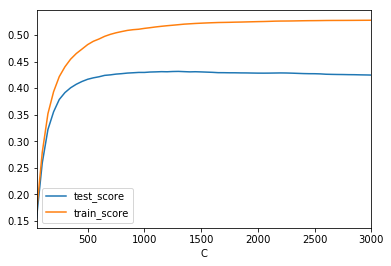

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

dataz = pd.DataFrame({ 'test_score': grid_result.cv_results_['mean_test_score'],
                       'train_score': grid_result.cv_results_['mean_train_score'],
                       'C': param_range })
dataz.plot(x='C')
plt.show()

The chart shows us that low values for C give bad results, and above ~ 1000 there is no more gains. Optimum looks to be in the 1000-1500 range.

### SVM tuning, the epsilon parameter

Second example, let's explore effects of the epsilon parameter.

In [34]:
param_range = range(2, 30, 2)

gsc = GridSearchCV(
    estimator=SVR(C=2500, epsilon=7),
    param_grid={
        'epsilon': param_range
    },
    cv=ShuffleSplit(n_splits=25, test_size=0.2)
)

grid_result = gsc.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.492939 using {'epsilon': 10}


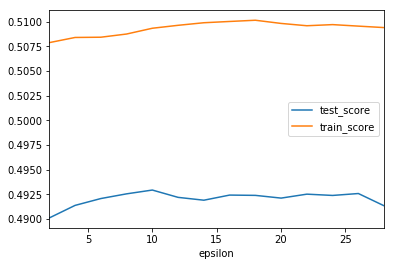

In [35]:
dataz = pd.DataFrame({ 'test_score': grid_result.cv_results_['mean_test_score'],
                       'train_score': grid_result.cv_results_['mean_train_score'],
                       'epsilon': param_range })
dataz.plot(x='epsilon')
plt.show()

The epsilon parameter has a less strong effect on outcome than the C parameter, for good results the range 8-20 looks fine. Note above chart is influenced by random seed and exact optimum differs, but seems to be within that range.

### SVM Tuning, both parameters

You can also tune multiple parameters simultaneously to explore interactions. Note this can take very long on larger datasets, since the amount of model fitting steps is related to the total number of parameter combinations..

In [36]:
gsc = GridSearchCV(
    estimator=SVR(),
    param_grid={
        'C': range(750,2001,250),
        'epsilon': range(6,15,2)
    },
    cv=ShuffleSplit(n_splits=25, test_size=0.2)
)

grid_result = gsc.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.491127 using {'C': 2000, 'epsilon': 10}


So overall the values we obtained tuning the individual parameters look fine. Combined the result is in the same range we found before!